In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
file_index= np.arange(1,9)
print(file_index)
data_files = []
for i in file_index:
    data_files.append(pd.read_csv('clean_subject'+str(i)+'.csv'))
print(data_files)

[1 2 3 4 5 6 7 8]
[       Unnamed: 0  Time:512Hz  Epoch  Electrode  Event Id
0            7680   15.000000    240       -5.0       0.0
1            7681   15.001953    240       36.0       0.0
2            7682   15.003906    240       67.0       0.0
3            7683   15.005859    240       52.0       0.0
4            7684   15.007812    240        8.0       0.0
5            7685   15.009766    240        9.0       0.0
6            7686   15.011719    240       18.0       0.0
7            7687   15.013672    240       83.0       0.0
8            7688   15.015625    240      144.0       0.0
9            7689   15.017578    240      107.0       0.0
10           7690   15.019531    240       71.0       0.0
11           7691   15.021484    240       81.0   33552.0
12           7692   15.023438    240       55.0       0.0
13           7693   15.025391    240       34.0       0.0
14           7694   15.027344    240       54.0       0.0
15           7695   15.029297    240       70.0      

(82944,)
(61952,)
(108640,)
(113952,)
(502112,)
(127776,)
(116768,)
(151552,)


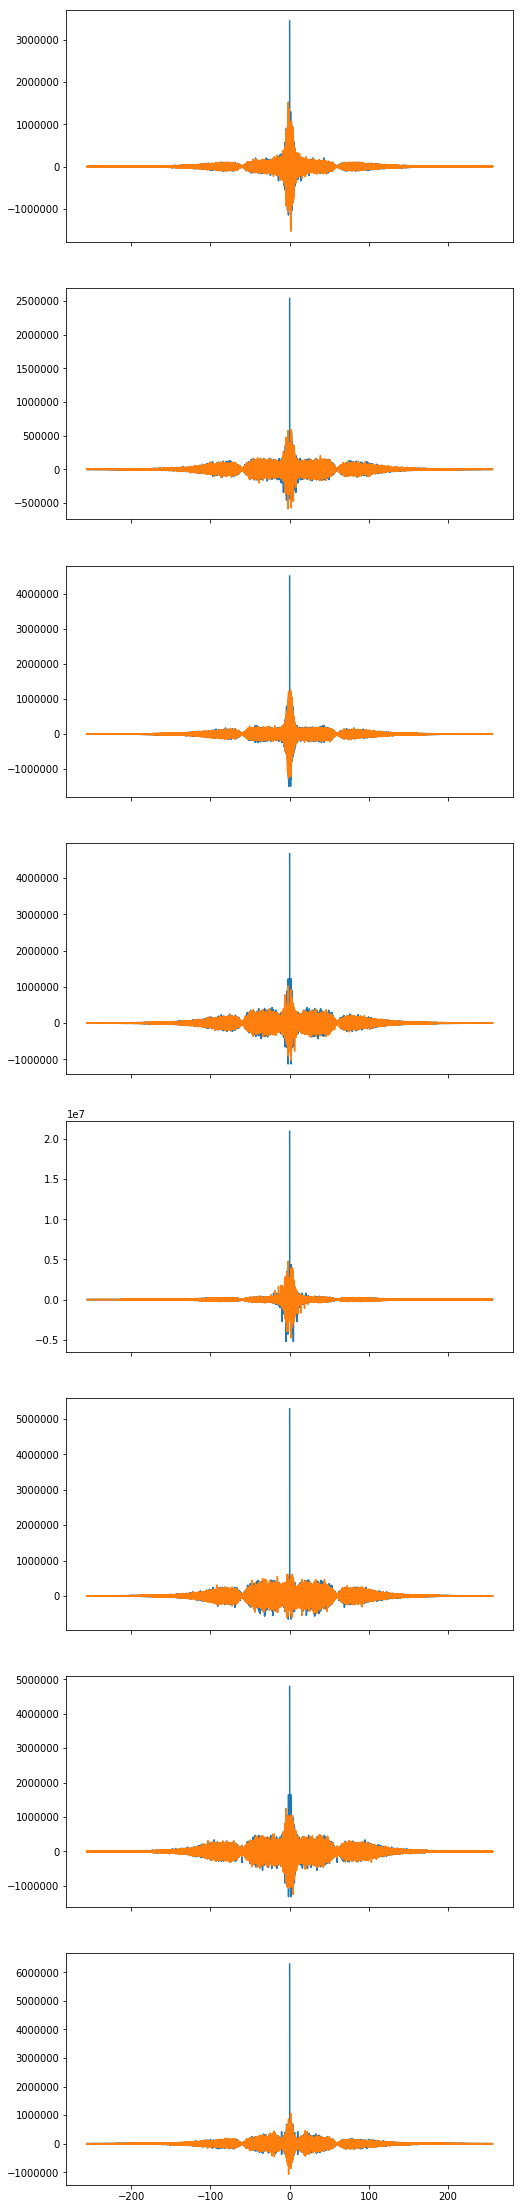

In [3]:
fft_data = []
fft_freq = []
for ind in file_index:
    fft_data.append(np.fft.fft(data_files[ind-1]['Electrode']))
    print(data_files[ind-1]['Electrode'].shape)
    fft_freq.append(np.fft.fftfreq(data_files[ind-1]['Electrode'].shape[0], 1/512))
f, axes = plt.subplots(8,1, sharex=True, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], fft_data[ind-1].real, fft_freq[ind-1], fft_data[ind-1].imag)
plt.show()


TypeError: sum expected at least 1 arguments, got 0

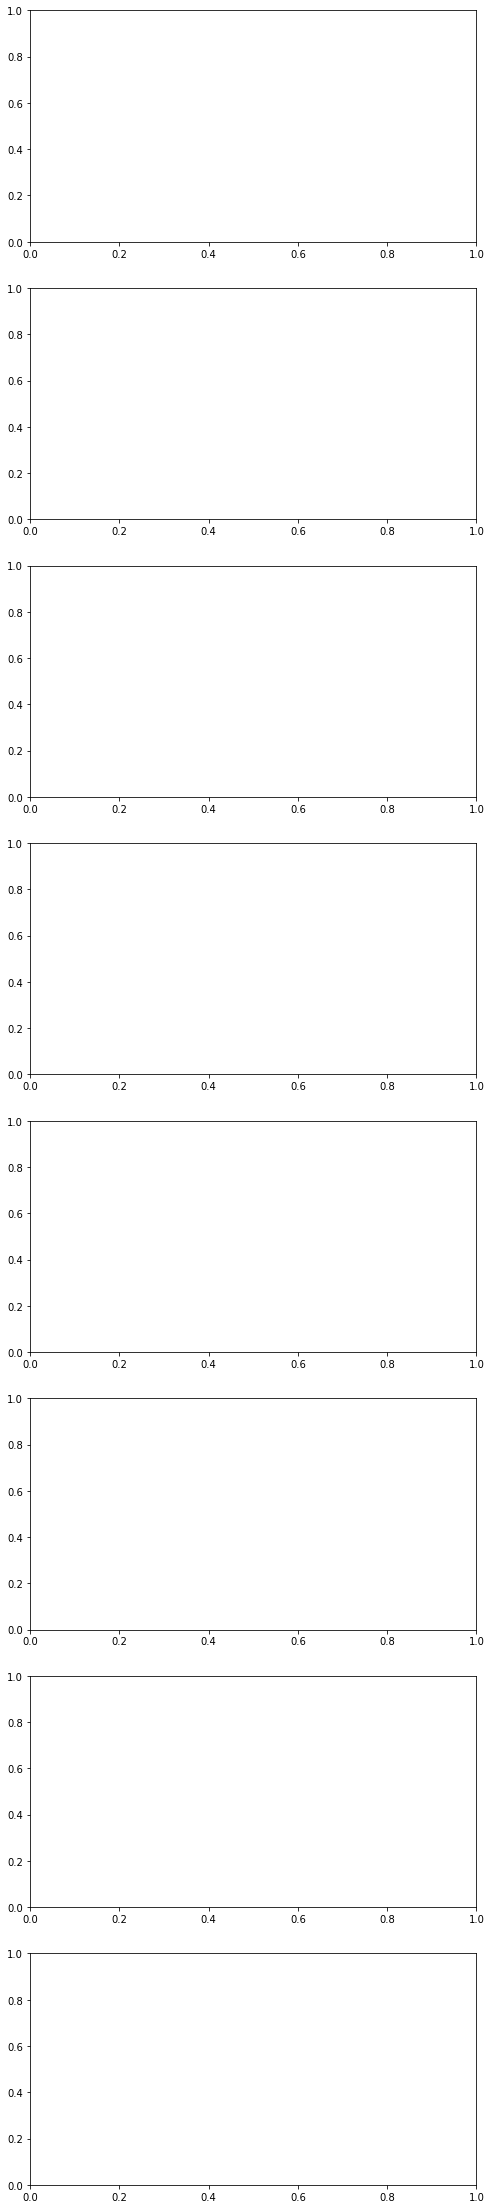

In [4]:
f, axes = plt.subplots(8,1, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])/sum())
    axes[ind-1].set_xlim(-60,60)
    axes[ind-1].set_ylim(-5,1000000000000)
plt.show()

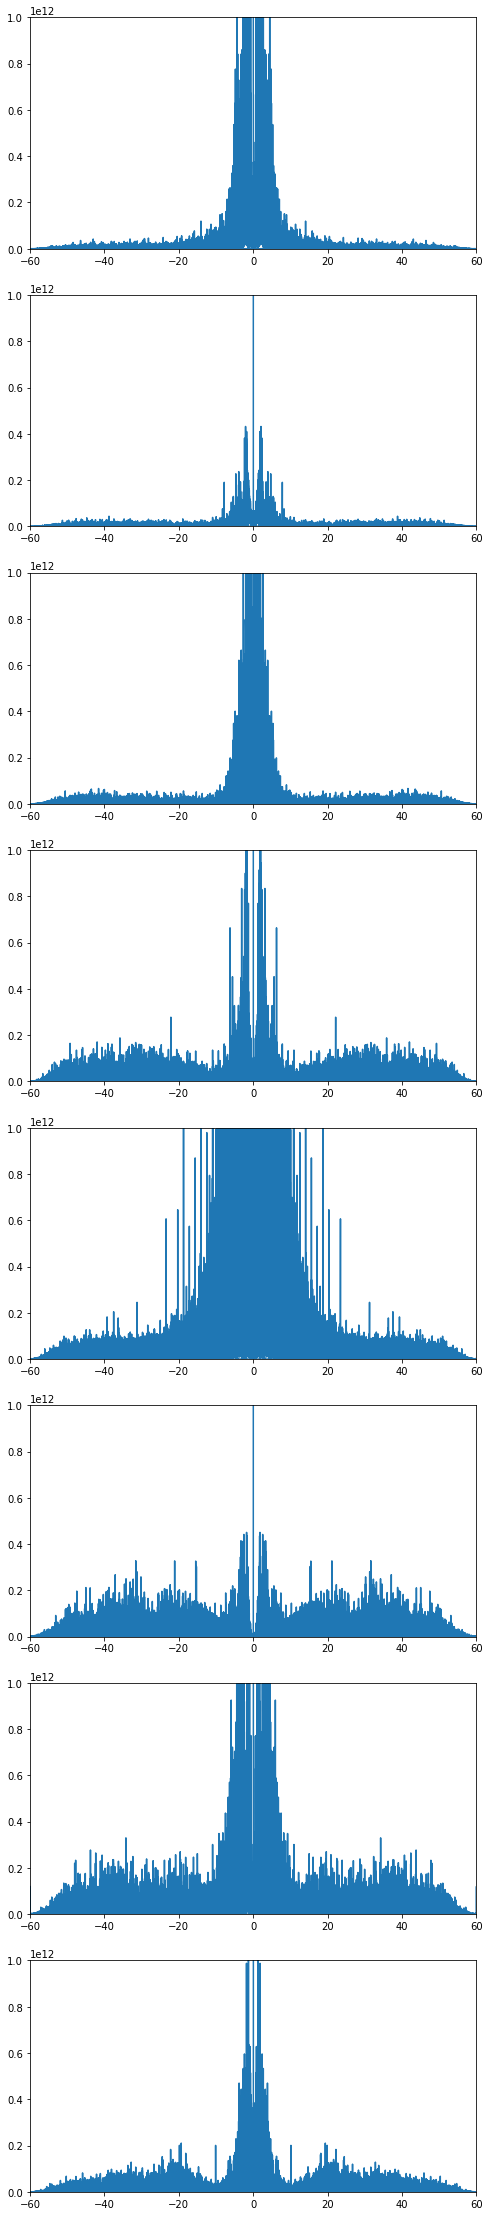

In [5]:
f, axes = plt.subplots(8,1, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])**2)
    axes[ind-1].set_xlim(-60,60)
    axes[ind-1].set_ylim(-5,1000000000000)
plt.show()

In [6]:
print(fft_freq[0])
print(fft_freq[0].shape)

[ 0.          0.00617284  0.01234568 ... -0.01851852 -0.01234568
 -0.00617284]
(82944,)


In [7]:
tot_times = []
for ind in (range(len(file_index))):
    tmp_series = np.array(data_files[ind]['Time:512Hz'])
    tot_times.append( tmp_series[-1] - tmp_series[0])
    print( tmp_series[-1] - tmp_series[0])

161.998046875
120.998046875
212.185546875
222.560546875
980.685546875
249.560546875
228.060546875
295.998046875


In [8]:
sep_elec_data_dfs = []
for i in range(len(file_index)):
    tmp_ser = data_files[i]['Electrode']
    tmp_df = pd.DataFrame()
    for j in range(int(tot_times[i]//5)):
        new_col = np.array(tmp_ser[j*512*5:(j+1)*512*5])
        tmp_df['Epoch'+str(j)] = new_col
    print(tmp_df.columns)
    sep_elec_data_dfs.append(tmp_df)
print(sep_elec_data_dfs[0].head())
        

Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23', 'Epoch24',
       'Epoch25', 'Epoch26', 'Epoch27', 'Epoch28', 'Epoch29', 'Epoch30',
       'Epoch31'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23'],
      dtype='object')
Index(['Epoch0', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5', 'Epoch6',
       'Epoch7', 'Epoch8', 'Epoch9', 'Epoch10', 'Epoch11', 'Epoch12',
       'Epoch13', 'Epoch14', 'Epoch15', 'Epoch16', 'Epoch17', 'Epoch18',
       'Epoch19', 'Epoch20', 'Epoch21', 'Epoch22', 'Epoch23', 'Epoch

In [9]:
#Waldo Data Epoching
wal_data_files = []
for i in file_index:
    wal_data_files.append(pd.read_csv('clean_waldo'+str(i)+'.csv'))
wal_data_files[0] = wal_data_files[0][666:].reset_index(drop=True) #Data issue for first ~700 datapoints
    
wal_tot_times = []
for ind in (range(len(file_index))):
    tmp_series = np.array(wal_data_files[ind]['Time:512Hz'])
    wal_tot_times.append( tmp_series[-1] - tmp_series[0])
    print( tmp_series[-1] - tmp_series[0])

wal_sep_elec_data_dfs = []
for i in range(len(file_index)):
    tmp_ser = wal_data_files[i]['Electrode']
    tmp_df = pd.DataFrame()
    #print(tmp_ser.size)
    #print(tmp_ser[2560:5120])
    for j in range(int(wal_tot_times[i]//5)):
        new_col = np.array(tmp_ser[j*512*5:(j+1)*512*5])
        tmp_df['Epoch'+str(j)] = new_col
        print(j*512*5,(j+1)*512*5)
    print(tmp_df.head())
    wal_sep_elec_data_dfs.append(tmp_df)
#print(len(Wal_sep_elec_data_dfs))

32.134765625
30.498046875
44.623046875
101.373046875
56.248046875
52.748046875
64.810546875
89.810546875
0 2560
2560 5120
5120 7680
7680 10240
10240 12800
12800 15360
   Epoch0  Epoch1  Epoch2  Epoch3  Epoch4  Epoch5
0   233.0    38.0   107.0    48.0   -66.0    38.0
1   460.0    38.0   104.0    58.0   -22.0    37.0
2   473.0    38.0   106.0    90.0    10.0    37.0
3   310.0    38.0   104.0    87.0    28.0    38.0
4    65.0    37.0    92.0    34.0    61.0    38.0
0 2560
2560 5120
5120 7680
7680 10240
10240 12800
12800 15360
   Epoch0  Epoch1  Epoch2  Epoch3  Epoch4  Epoch5
0   225.0    60.0    59.0     2.0   -28.0   -17.0
1   204.0    56.0    57.0    20.0   -34.0    -2.0
2   133.0    20.0    68.0    39.0   -37.0   -11.0
3    86.0    -4.0    54.0    49.0   -28.0   -22.0
4    74.0   -38.0    57.0    66.0    -5.0     1.0
0 2560
2560 5120
5120 7680
7680 10240
10240 12800
12800 15360
15360 17920
17920 20480
   Epoch0  Epoch1  Epoch2  Epoch3  Epoch4  Epoch5  Epoch6  Epoch7
0    74.0    11.0  

In [30]:
avg_wal_power_bands = []
std_wal_power_bands = []
df = wal_sep_elec_data_dfs[0]
freq_df = np.fft.fftfreq(df['Epoch0'].shape[0], 1/512)

print(max(freq_df), min(freq_df), len(freq_df))
#4-7Hz Theta
theta_start_ind = int(np.argwhere(freq_df == 4.0))
theta_end_ind = int(np.argwhere(freq_df == 7.0))
print(theta_start_ind, theta_end_ind)
#0.2->4Hz Delta
delta_start_ind = int(np.argwhere(freq_df == 0.2))
delta_end_ind = int(np.argwhere(freq_df == 4.0))
print(delta_start_ind, delta_end_ind)
#8-12 Alpha
alpha_start_ind = int(np.argwhere(freq_df == 8.0))
alpha_end_ind = int(np.argwhere(freq_df == 12.0))
print(alpha_start_ind, alpha_end_ind)
#30-100Hz Gamma (artifact?)

for i in range(len(file_index)):
    tmp_df = wal_sep_elec_data_dfs[i]
    pow_df = pd.DataFrame()
    for col in tmp_df.columns:
        pow_df[col] = np.abs(np.fft.fft(tmp_df[col]))**2
    theta_pwrs = []
    delta_pwrs = []
    alpha_pwrs = []
    for col in pow_df.columns:
        tot_pow = sum(pow_df[col][:int(len(pow_df[col])/2)]) #calc total sum (first half of power-only the pos)
        #grab theta band
        #sum and normalize
        #place in list
        theta_pwrs.append((sum(pow_df[col][theta_start_ind:theta_end_ind]))/tot_pow)
        #reapeat last 3 steps for alpha and delta
        delta_pwrs.append((sum(pow_df[col][delta_start_ind:delta_end_ind]))/tot_pow)
        alpha_pwrs.append((sum(pow_df[col][alpha_start_ind:alpha_end_ind]))/tot_pow)
        
    #print(theta_pwrs,np.mean(theta_pwrs),np.std(theta_pwrs))
    #avg theta band
    #calc std theta
    wal_band_avg = [np.mean(theta_pwrs), np.mean(delta_pwrs), np.mean(alpha_pwrs)]
    wal_band_std = [np.std(theta_pwrs), np.std(delta_pwrs), np.std(alpha_pwrs)]
    avg_wal_power_bands.append(wal_band_avg)
    std_wal_power_bands.append(wal_band_std)
        

255.8 -256.0 2560
20 35
1 20
40 60
[0.1353534701614961, 0.1384619620308249, 0.13417086967901495, 0.022758486306578642, 0.15403778381540215, 0.11085079249772077] 0.11593889408183956 0.04354427221841345
[0.10860778293896876, 0.14740557477358143, 0.09816621747119707, 0.07783495495406643, 0.08505110875434142, 0.05884355685693864] 0.0959848659581823 0.02779876730003574
[0.06787636389688759, 0.03395789078900816, 0.06365306183301926, 0.031953620633985956, 0.010242196393020729, 0.04645529453401962, 0.015060849777967771, 0.01969537155945906] 0.03611183117717102 0.020243222018082842
[0.16239658128334783, 0.10170223572062101, 0.0837996273874027, 0.14029390426631982, 0.036852093670772246, 0.06593717412787264, 0.22790283213885815, 0.032382633948383234, 0.040813422864369724, 0.11302822645169536, 0.0552967771498496, 0.14762220565787668, 0.07089083049471713, 0.13407680510442938, 0.06787692461609833, 0.11730887013301024, 0.08621352347903928, 0.1394166161496097, 0.05883415601257226, 0.21577216107811906]

In [31]:
print(avg_wal_power_bands)

[[0.11593889408183956, 0.7526004157335021, 0.033411260283120706], [0.0959848659581823, 0.12936162482119554, 0.04765816244473991], [0.03611183117717102, 0.1568064657554408, 0.021510100515853815], [0.10492088008674823, 0.1726825342170894, 0.04623015237428359], [0.1696429284868354, 0.5366549363610648, 0.05684356304919442], [0.07497679228190168, 0.1279338173737355, 0.04659588640624958], [0.09211526668048099, 0.1877450392806714, 0.0534363925879029], [0.12130340466308472, 0.20191651605795324, 0.055960870910443834]]


In [51]:
lst_all_lbl_data = []
for i in range(len(file_index)):
    lst_subj_lbl = []
    eating_sep_df = sep_elec_data_dfs[i]
    avg_wal_pwr = avg_wal_power_bands[i]
    std_wal_pwr = std_wal_power_bands[i]
    print('subject: '+ str(i+1))
    theta_pwrs = []
    delta_pwrs = []
    alpha_pwrs = []
    for col in eating_sep_df.columns:
        #print(col)
        tmp_epoch = eating_sep_df[col]
        epoch_pwr = np.abs(np.fft.fft(tmp_epoch))**2
        tot_pow = sum(epoch_pwr[:int(len(epoch_pwr)/2)]) #calc total sum (first half of power-only the pos)
        #grab theta band
        #sum and normalize
        #place in list
        theta = (sum(epoch_pwr[theta_start_ind:theta_end_ind]))/tot_pow
        delta = (sum(epoch_pwr[delta_start_ind:delta_end_ind]))/tot_pow
        alpha = (sum(epoch_pwr[alpha_start_ind:alpha_end_ind]))/tot_pow
        theta_pwrs.append(theta)
        #reapeat last 3 steps for alpha and delta
        delta_pwrs.append(delta)
        alpha_pwrs.append(alpha)
        band_pwrs = np.array([theta, delta, alpha])
        
        z_scores = np.array((band_pwrs - np.array(avg_wal_pwr))/np.array(std_wal_pwr))
        #print(z_scores)
        z_score_mean = np.mean(abs(z_scores))
        #print(z_score_mean)
        if z_score_mean > 1.25: #p-val < 0.1056
            lst_subj_lbl.append(0)
        else:
            lst_subj_lbl.append(1)
    df_labeled_band = pd.DataFrame(index = [eating_sep_df.columns])
    df_labeled_band['Label'] = lst_subj_lbl
    df_labeled_band['Theta_Power'] = theta_pwrs
    df_labeled_band['Delta_Power'] = delta_pwrs
    df_labeled_band['Alpha_Power'] = alpha_pwrs
    print(df_labeled_band['Label'].value_counts())
    lst_all_lbl_data.append(df_labeled_band)
        

subject: 1
0    27
1     5
Name: Label, dtype: int64
subject: 2
0    14
1    10
Name: Label, dtype: int64
subject: 3
0    37
1     5
Name: Label, dtype: int64
subject: 4
1    36
0     8
Name: Label, dtype: int64
subject: 5
1    148
0     48
Name: Label, dtype: int64
subject: 6
1    25
0    24
Name: Label, dtype: int64
subject: 7
1    32
0    13
Name: Label, dtype: int64
subject: 8
0    35
1    24
Name: Label, dtype: int64


In [ ]:
#4-7Hz Theta
#0.1->4Hz Delta
#8-12 Alpha
#30-100Hz Gamma (artifact?)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, metrics
import statsmodels.api as sm

In [61]:
lst_all_errors = []
for i in range(len(lst_all_lbl_data)):
    print()
    print('Subject ' + str(i+1))
    tmp_df = lst_all_lbl_data[i].sample(frac=1)
    tmp_y = tmp_df['Label'].values
    tmp_Xs = tmp_df[['Theta_Power', 'Delta_Power', 'Alpha_Power']].values
    kf = model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
    kf.get_n_splits(tmp_Xs)
    X_tr = []
    X_te = []
    y_tr = []
    y_te = []
    tr_errors = []
    te_errors = []
    for tr_ind, te_ind in kf.split(tmp_Xs):
        X_tr.append(tmp_Xs[tr_ind])
        X_te.append(tmp_Xs[te_ind])
        y_tr.append(tmp_y[tr_ind])
        y_te.append(tmp_y[te_ind])
    
    for j in range(len(X_tr)):
        Xc_tr = sm.add_constant(X_tr[j])
        Xc_te = sm.add_constant(X_te[j])
        tmp_mod = sm.Logit(y_tr[j], Xc_tr)
        tmp_res = tmp_mod.fit(method = 'bfgs')
        print(tmp_res.summary2())
        y_hat_tr = tmp_res.predict(Xc_tr) > 0.5
        y_hat_te = tmp_res.predict(Xc_te) > 0.5
        print(y_hat_tr)
        num_tr_wrong = sum(y_hat_tr != y_tr[j])
        num_te_wrong = sum(y_hat_te != y_te[j])
        tr_err = num_tr_wrong / len(y_tr[j])
        te_err = num_te_wrong / len(y_te[j])
        tr_errors.append(tr_err)
        te_errors.append(te_err)
        print('train error: ', tr_err, 'test error: ', te_err)
    
    error_df = pd.DataFrame()
    error_df['Train_Error'] = tr_errors
    error_df['Test_Error'] = te_errors
    print(error_df)
    lst_all_errors.append(error_df)


Subject 1
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31


A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
A:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
A:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
A:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

                          Results: Logit
Model:              Logit            Pseudo R-squared: 1.000      
Dependent Variable: y                AIC:              8.0003     
Date:               2019-03-15 18:50 BIC:              12.1784    
No. Observations:   21               Log-Likelihood:   -0.00014601
Df Model:           3                LL-Null:          -8.6124    
Df Residuals:       17               LLR p-value:      0.00063541 
Converged:          1.0000           Scale:            1.0000     
---------------------------------------------------------------------
              Coef.      Std.Err.     z     P>|z|    [0.025    0.975]
---------------------------------------------------------------------
const       -259.2824         nan    nan      nan       nan       nan
x1          -167.7599         nan    nan      nan       nan       nan
x2           437.1740         nan    nan      nan       nan       nan
x3           -40.1513         nan    nan      nan       nan       nan


A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-pac

[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False  True False]
train error:  0.03571428571428571 test error:  0.07142857142857142
   Train_Error  Test_Error
0     0.071429    0.214286
1     0.035714    0.071429
2     0.035714    0.071429

Subject 4
         Current function value: 0.035612
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.923     
Dependent Variable: y                AIC:              10.0655   
Date:               2019-03-15 18:50 BIC:              15.5347   
No. Observations:   29               Log-Likelihood:   -1.0328   
Df Model:           3                LL-Null:          -13.331   
Df Residuals:       25               LLR p-value:      1.8748e-05
Converged:          0.0000           Scale:            1.0000    
------

A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
A:\Anaconda3\lib\site-pac

         Current function value: 0.595027
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.127  
Dependent Variable: y                AIC:              47.2718
Date:               2019-03-15 18:50 BIC:              53.2578
No. Observations:   33               Log-Likelihood:   -19.636
Df Model:           3                LL-Null:          -22.494
Df Residuals:       29               LLR p-value:      0.12630
Converged:          0.0000           Scale:            1.0000 
---------------------------------------------------------------
         Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------
const    -2.4901    1.5705  -1.5855  0.1129   -5.5683    0.5881
x1      -27.2243   18.5437  -1.4681  0.1421  -63.5693    9.1206
x2       22.5731   13.4364   1.6800  0.0930   -3.7617   48.9079
x3

A:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
